# Tiền xử lý dữ liệu

In [ ]:
import pandas as pd
import numpy as np
import folium
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
# chuyển object của ngày sang dạng ngày
# chuyển cột date sang kiểu thời gian
df['date'] = pd.to_datetime(df['date'])
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df.describe()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,2014-10-29 04:38:01.959931648,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
min,1.000102e+06,2014-05-02 00:00:00,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,2014-07-22 00:00:00,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,2014-10-16 00:00:00,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,2015-02-17 00:00:00,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,2015-05-27 00:00:00,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000
std,2.876566e+09,NaN,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631


## Kiểm tra giá trị null, dòng trùng nhau và ID trùng nhau

In [ ]:
# Kiểm tra tổng số giá trị null ở từng cột
df.isnull().sum()

,0
id,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0


In [ ]:
# xem xem các cột có chứa giá trị có trùng nhau hay không
# Kiểm tra số dòng trùng lặp hoàn toàn
duplicate_rows = df[df.duplicated()]

# In ra số lượng dòng trùng
print(f"Số dòng trùng nhau: {duplicate_rows.shape[0]}")

Số dòng trùng nhau: 0


In [ ]:
#  kiểm tra ID theo cột
duplicate_ids = df[df.duplicated(subset=['id'])]
print(f"Số dòng có ID trùng nhau: {duplicate_ids.shape[0]}")

Số dòng có ID trùng nhau: 177


In [ ]:
# Tìm tất cả các ID bị trùng (xuất hiện nhiều hơn 1 lần)
duplicate_ids = df['id'][df['id'].duplicated(keep=False)]

# Lọc toàn bộ các dòng có ID nằm trong danh sách bị trùng
duplicate_rows = df[df['id'].isin(duplicate_ids)]

# Hiển thị kết quả
print(duplicate_rows)

               id       date      price  bedrooms  bathrooms  sqft_living  \
93     6021501535 2014-07-25   430000.0         3       1.50         1580   
94     6021501535 2014-12-23   700000.0         3       1.50         1580   
313    4139480200 2014-06-18  1384000.0         4       3.25         4290   
314    4139480200 2014-12-09  1400000.0         4       3.25         4290   
324    7520000520 2014-09-05   232000.0         2       1.00         1240   
...           ...        ...        ...       ...        ...          ...   
20670  8564860270 2015-03-30   502000.0         4       2.50         2680   
20779  6300000226 2014-06-26   240000.0         4       1.00         1200   
20780  6300000226 2015-05-04   380000.0         4       1.00         1200   
21580  7853420110 2014-10-03   594866.0         3       3.00         2780   
21581  7853420110 2015-05-04   625000.0         3       3.00         2780   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
93    

In [ ]:
#  giải pháp để xóa trùng ID là giữ ngày đăng mới hơn bỏ ngày đăng cũ
df_sorted = df.sort_values(by=['id', 'date'], ascending=[True, False])

df_cleaned = df_sorted.drop_duplicates(subset='id', keep='first')

print(f"Số dòng ban đầu: {df.shape[0]}")
print(f"Số dòng sau khi loại ID trùng (giữ ngày mới nhất): {df_cleaned.shape[0]}")

Số dòng ban đầu: 21613
Số dòng sau khi loại ID trùng (giữ ngày mới nhất): 21436


In [ ]:
#  kiểm tra ID theo cột
duplicate_ids = df_cleaned[df_cleaned.duplicated(subset=['id'])]
print(f"Số dòng có ID trùng nhau: {duplicate_ids.shape[0]}")

Số dòng có ID trùng nhau: 0


## Kiểm tra các cột có bao nhiêu dòng có dấu ?(Sai định dạng)

In [ ]:
question_mark_values = (df == '?').sum()
print(question_mark_values)

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


## Phân tích tương quan (correlation) với price

In [ ]:
corr_with_price = df_cleaned.corr()['price'].sort_values(ascending=False)
print(corr_with_price)

price            1.000000
sqft_living      0.701413
grade            0.666313
sqft_above       0.604626
sqft_living15    0.583930
bathrooms        0.524444
view             0.396601
sqft_basement    0.323975
bedrooms         0.309203
lat              0.306754
waterfront       0.266966
floors           0.254964
yr_renovated     0.126717
sqft_lot         0.088572
sqft_lot15       0.081645
yr_built         0.051071
condition        0.034532
long             0.019412
date            -0.006154
id              -0.018438
zipcode         -0.050967
Name: price, dtype: float64


## Phân tích tương quan giữa các cột với nhau với heatmap

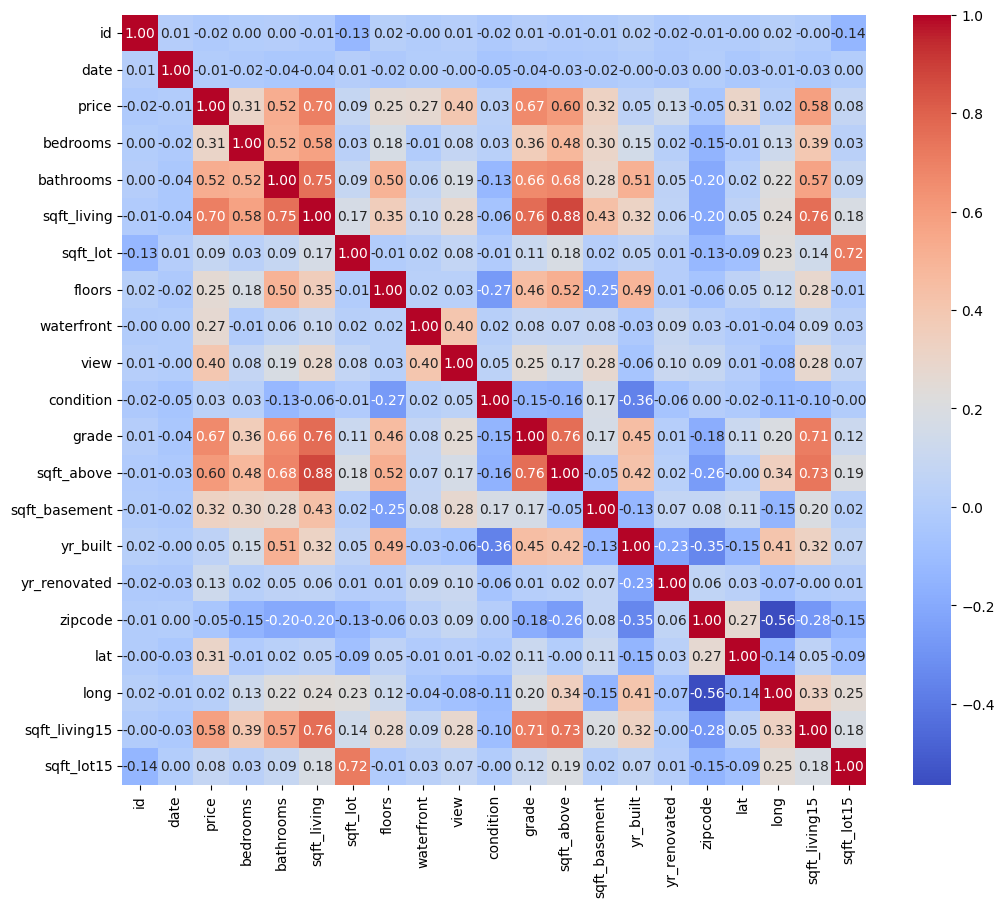

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,10))
sns.heatmap(df_cleaned.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

## Loại bỏ các cột không tương quan nhiều với cột price

In [ ]:
# Danh sách các cột cần loại bỏ
cols_to_drop = ['waterfront', 'floors', 'yr_renovated', 'sqft_lot', 'yr_built', 'sqft_lot15', 'condition', 'date', 'id', 'zipcode']

# Loại bỏ các cột này khỏi DataFrame
df_cleaned = df_cleaned.drop(columns=cols_to_drop)

# Kiểm tra lại các cột còn lại
print(df_cleaned.columns)

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'view', 'grade',
       'sqft_above', 'sqft_basement', 'lat', 'long', 'sqft_living15'],
      dtype='object')


## Dựa vào describe xử lý các giá trị bất thường

In [ ]:
df_cleaned.describe()

,price,bedrooms,bathrooms,sqft_living,view,grade,sqft_above,sqft_basement,lat,long,sqft_living15
count,2.143600e+04,21436.000000,21436.000000,21436.000000,21436.000000,21436.000000,21436.000000,21436.000000,21436.000000,21436.000000,21436.000000
mean,5.416500e+05,3.371571,2.117349,2082.704936,0.235118,7.661737,1790.960440,291.744495,47.560156,-122.213697,1988.314378
std,3.673149e+05,0.929205,0.769913,919.146469,0.767092,1.174256,829.026491,442.781983,0.138601,0.140896,685.699093
min,7.500000e+04,0.000000,0.000000,290.000000,0.000000,1.000000,290.000000,0.000000,47.155900,-122.519000,399.000000
25%,3.248660e+05,3.000000,1.750000,1430.000000,0.000000,7.000000,1200.000000,0.000000,47.471100,-122.328000,1490.000000
50%,4.500000e+05,3.000000,2.250000,1920.000000,0.000000,7.000000,1560.000000,0.000000,47.572000,-122.230000,1840.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,0.000000,8.000000,2220.000000,560.000000,47.678000,-122.124000,2370.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,4.000000,13.000000,9410.000000,4820.000000,47.777600,-121.315000,6210.000000


## Biểu đồ Histogram

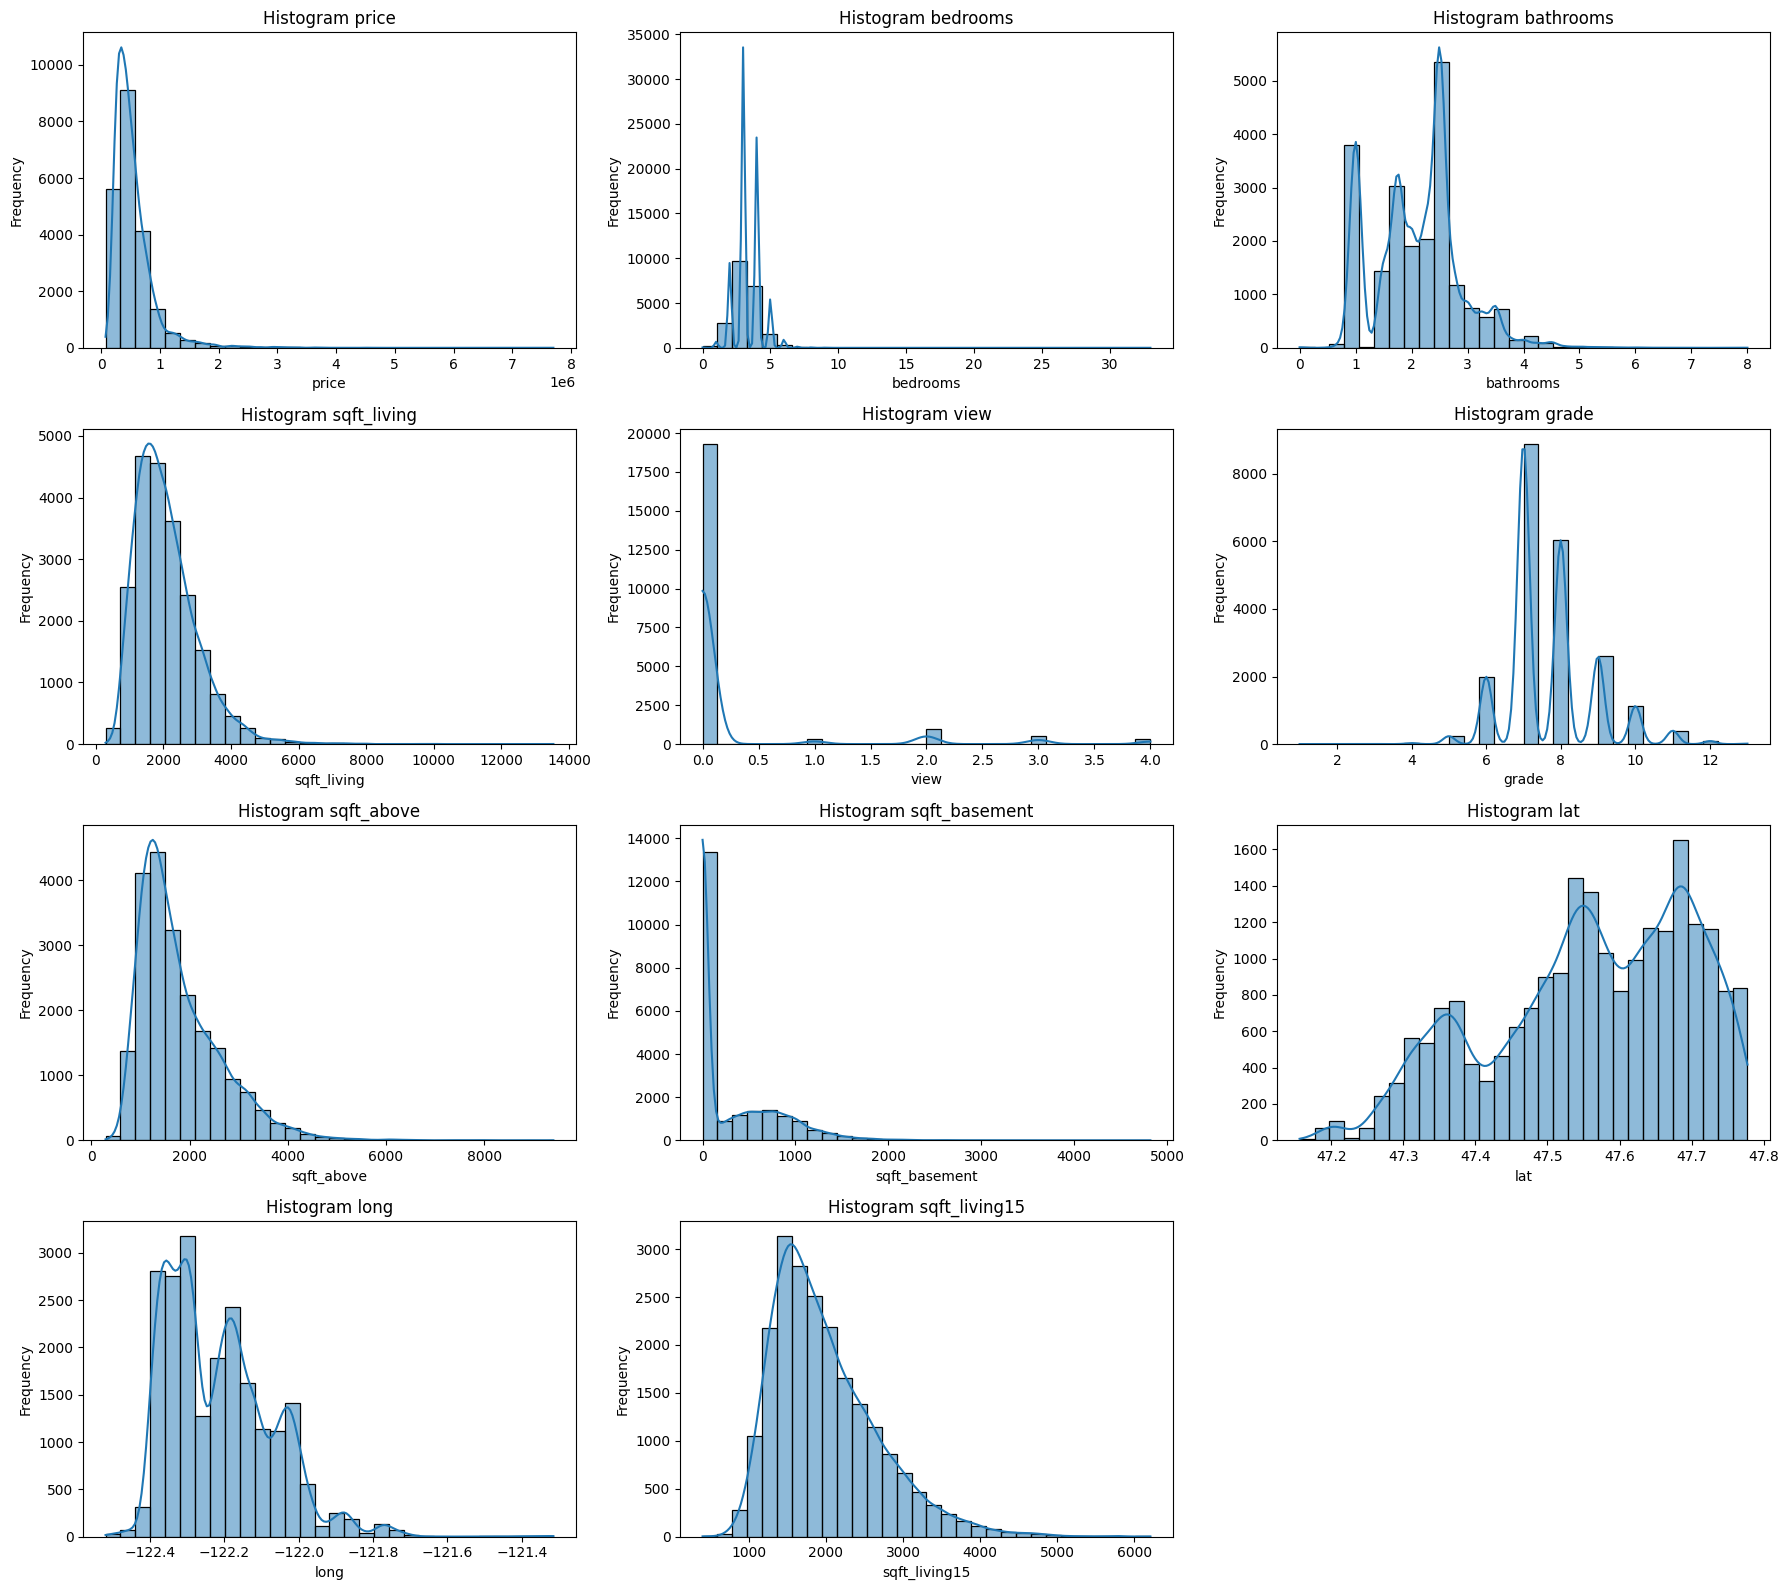

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

cols = df_cleaned.columns.tolist()

cols_per_row = 3
num_rows = (len(cols) + cols_per_row - 1) // cols_per_row

plt.figure(figsize=(cols_per_row * 6, num_rows * 4))

for i, col in enumerate(cols):
    plt.subplot(num_rows, cols_per_row, i + 1)
    sns.histplot(df_cleaned[col], kde=True, bins=30)
    plt.title(f'Histogram {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## Kiểm tra các cột có giá trị lệch nhiều về 0

In [ ]:
import pandas as pd

zero_counts = (df_cleaned == 0).sum()

print(zero_counts)

price                0
bedrooms            13
bathrooms           10
sqft_living          0
view             19320
grade                0
sqft_above           0
sqft_basement    13015
lat                  0
long                 0
sqft_living15        0
dtype: int64


## Vì cột view và sqft_basement có giá trị nhiều phân bố về 0 hầu như không có giá trị nên có thể bỏ

In [ ]:
cols_to_drop = ['view', 'sqft_basement']

# Loại bỏ các cột này khỏi DataFrame
df_cleaned = df_cleaned.drop(columns=cols_to_drop)

# Kiểm tra lại các cột còn lại
print(df_cleaned.columns)

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'grade', 'sqft_above',
       'lat', 'long', 'sqft_living15'],
      dtype='object')


## Hiển thị lại biểu đồ Histogram để kiểm tra

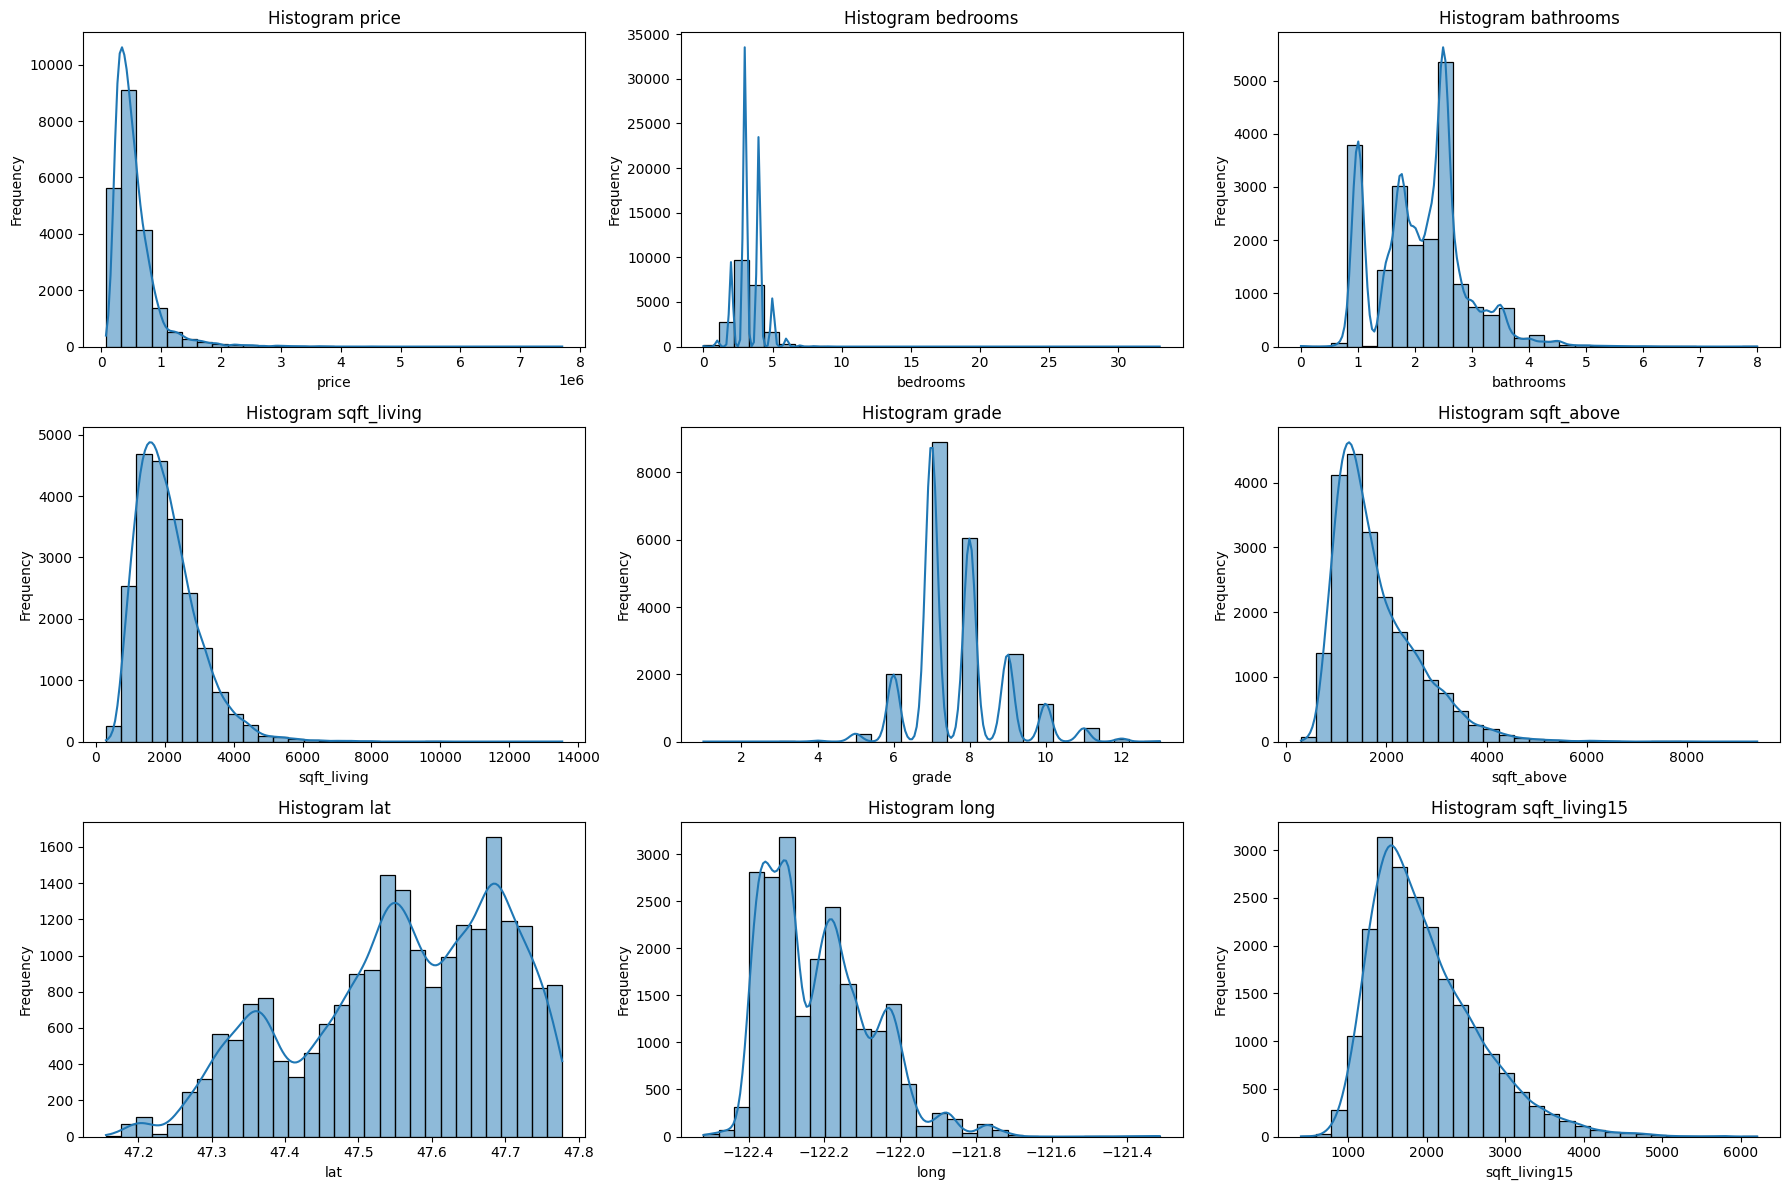

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

cols = df_cleaned.columns.tolist()

cols_per_row = 3
num_rows = (len(cols) + cols_per_row - 1) // cols_per_row

plt.figure(figsize=(cols_per_row * 6, num_rows * 4))

for i, col in enumerate(cols):
    plt.subplot(num_rows, cols_per_row, i + 1)
    sns.histplot(df_cleaned[col], kde=True, bins=30)
    plt.title(f'Histogram {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## Hiển thị khoảng chênh lệch giữa các cột

In [ ]:
def show_feature_ranges(df_cleaned):
    print(" Khoảng giá trị của từng cột (Trước khi scaling về cùng 1 giá trị):")
    print("-" * 50)

    # Key features for analysis
    features = ['lat', 'long', 'price', 'sqft_living', 'sqft_above', 'sqft_living15',
               'bedrooms', 'bathrooms', 'grade', 'floors']

    print("Tên cột: ------ Giá trị Min - Giá trị Max - Khoảng giá trị")

    for feature in features:
        if feature in df_cleaned.columns:
            min_val = df_cleaned[feature].min()
            max_val = df_cleaned[feature].max()
            range_val = max_val - min_val
            print(f"{feature:<15}: {min_val:>10,.1f} - {max_val:>12,.1f}  (range: {range_val:>12,.1f})")

show_feature_ranges(df_cleaned)

 Khoảng giá trị của từng cột (Trước khi scaling về cùng 1 giá trị):
--------------------------------------------------
Tên cột: ------ Giá trị Min - Giá trị Max - Khoảng giá trị
lat            :       47.2 -         47.8  (range:          0.6)
long           :     -122.5 -       -121.3  (range:          1.2)
price          :   75,000.0 -  7,700,000.0  (range:  7,625,000.0)
sqft_living    :      290.0 -     13,540.0  (range:     13,250.0)
sqft_above     :      290.0 -      9,410.0  (range:      9,120.0)
sqft_living15  :      399.0 -      6,210.0  (range:      5,811.0)
bedrooms       :        0.0 -         33.0  (range:         33.0)
bathrooms      :        0.0 -          8.0  (range:          8.0)
grade          :        1.0 -         13.0  (range:         12.0)


#### Vì bedrooms và bathrooms đều có các giá trị scale rất nhỏ so với giá và không tốt bằng grade về tính phân loại nên sẽ gần như không có tác dụng gì cho việc phân cụm giá nhà bằng DBSCAN

## Phân tích chọn ra đặc trưng tối ưu

## Hiển thị toạ độ với kinh độ và vĩ độ trên vị trí địa lý thực tế

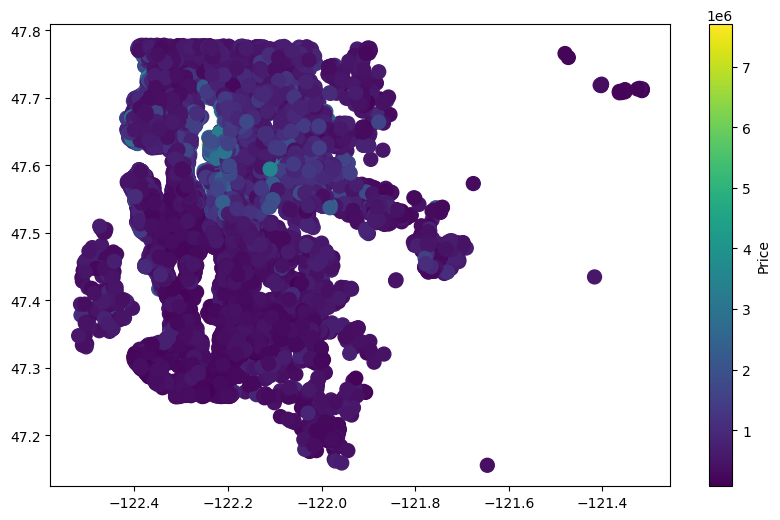

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['long'], df['lat'], c=df['price'], cmap='viridis', s=100)
plt.colorbar(label='Price')
plt.show()

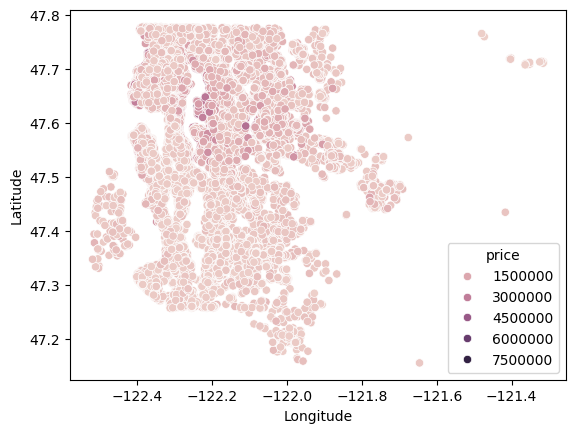

In [ ]:
sns.scatterplot(data=df, x='long', y='lat', hue='price')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

#### Dựa trên biểu đồ giá trị toạ độ với kinh độ và vĩ độ theo giá thì mật độ toạ độ với giá không liên kết với nhau nên kinh độ và vĩ độ không có giá trị cho việc phân cụm giá nhà bằng DBSCAN nên có thể bỏ

#### sqft_above là phần không gian sinh hoạt trên mặt đất của ngôi nhà nên có nghĩa sqft_above = sqft_living (phần không gian trên) - sqft_basement (phần không gian dưới) suy ra cột này cũng không có ý nghĩa như sqft_basement vì đã có sqft_living rồi

In [ ]:
df_final = df_cleaned.copy()
features_optimized = ['price', 'sqft_living', 'grade']
X_raw = df_final[features_optimized].copy()

## Log transformation cho dữ liệu vì bị lệch phải

In [ ]:
print("Trước khi áp Log Transformation:")
print(f"Price skewness: {X_raw['price'].skew():.3f}")
print(f"Sqft_living skewness: {X_raw['sqft_living'].skew():.3f}")

Trước khi áp Log Transformation:
Price skewness: 4.036
Sqft_living skewness: 1.471


In [ ]:
# Giảm thiệu sự tác động quá lớn của giá nhà quá cao
# Làm cho sự phân phối dữ liệu đều hơn
X_transformed = X_raw.copy()
X_transformed['price'] = np.log1p(X_raw['price'])  # log1p = log(1+x) handles zeros
X_transformed['sqft_living'] = np.log1p(X_raw['sqft_living'])

In [ ]:
print(f"Sau khi áp Log Transformation:")
print(f"Log(Price) skewness: {X_transformed['price'].skew():.3f}")
print(f"Log(Sqft_living) skewness: {X_transformed['sqft_living'].skew():.3f}")

Sau khi áp Log Transformation:
Log(Price) skewness: 0.446
Log(Sqft_living) skewness: -0.036


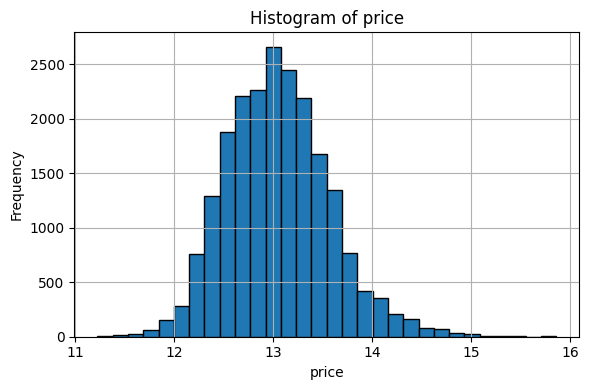

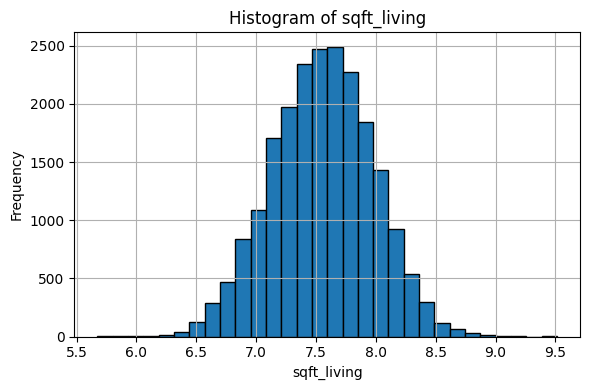

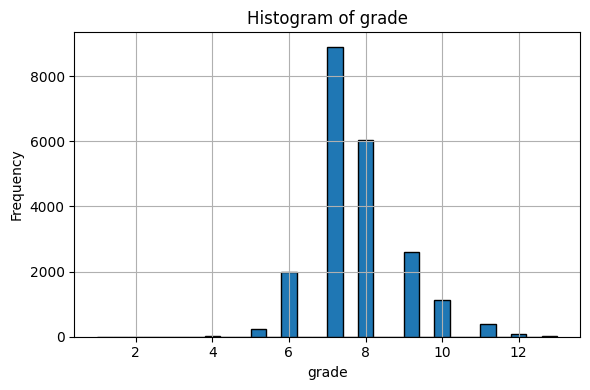

In [ ]:
# Vẽ histogram cho từng feature
for column in X_transformed.columns:
    plt.figure(figsize=(6, 4))
    plt.hist(X_transformed[column], bins=30, edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

#### Dữ liệu đã trông "ổn hơn" nhưng giá trị vẫn chênh lệnh quá cao giữa các cột và còn nhiều giá trị ngoại biên

## Kiểm tra ngoại lai(Outliers) với biểu đồ Boxplot

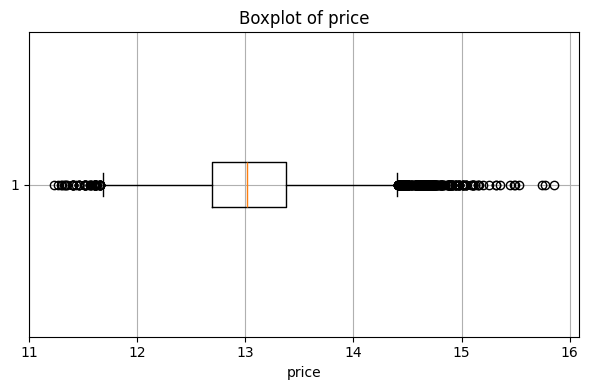

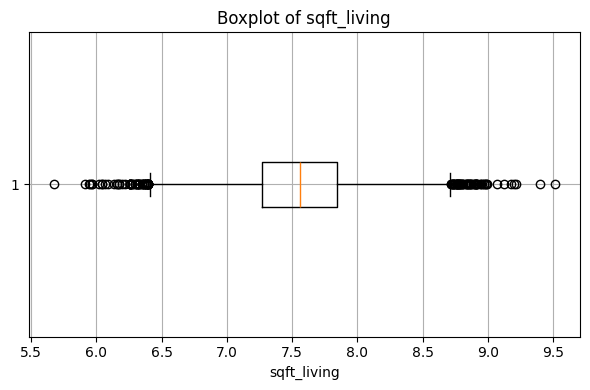

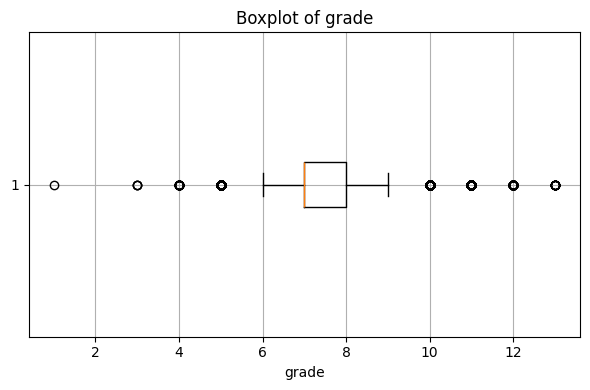

In [ ]:
for column in X_transformed.columns:
    plt.figure(figsize=(6, 4))
    plt.boxplot(X_transformed[column], vert=False)
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

## Sử dụng RobustScaler

In [ ]:
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler (median=0, IQR-based scaling)
scaler_robust = RobustScaler()
X_robust = scaler_robust.fit_transform(X_transformed)

X_scaled = X_robust
scaler_final = scaler_robust

print(f" Scaled shape: {X_scaled.shape}")

 Scaled shape: (21436, 3)


#### Sử dụng RobustScaler vì nó là một phương pháp rất mạnh để giảm sự ảnh hưởng của outliers khi chuẩn hóa dữ liệu dựa trên median và Interquartile Range (IQR) nhưng nó không loại bỏ hoàn toàn outliers

## Kiểm tra tập dữ liệu sau khi đã áp Log Stransform và Robust Scaler

In [ ]:
# Chuyển ma trận X_scaled trở lại thành DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X_transformed.columns)
print(X_scaled_df)

          price  sqft_living  grade
0     -0.591197     0.385807    0.0
1      0.530550     0.121681    1.0
2     -0.171736    -0.473481    0.0
3     -0.947253    -0.509369   -1.0
4     -0.162651    -0.261999    0.0
...         ...          ...    ...
21431 -0.305247    -0.315194    0.0
21432 -0.246525    -1.059767    0.0
21433 -0.412995    -0.962836    0.0
21434 -0.172101    -0.533715    2.0
21435 -0.750501    -0.647724   -1.0

[21436 rows x 3 columns]


## EDA (Exploratory Data Analysis), Phân tích dữ liệu khám phá

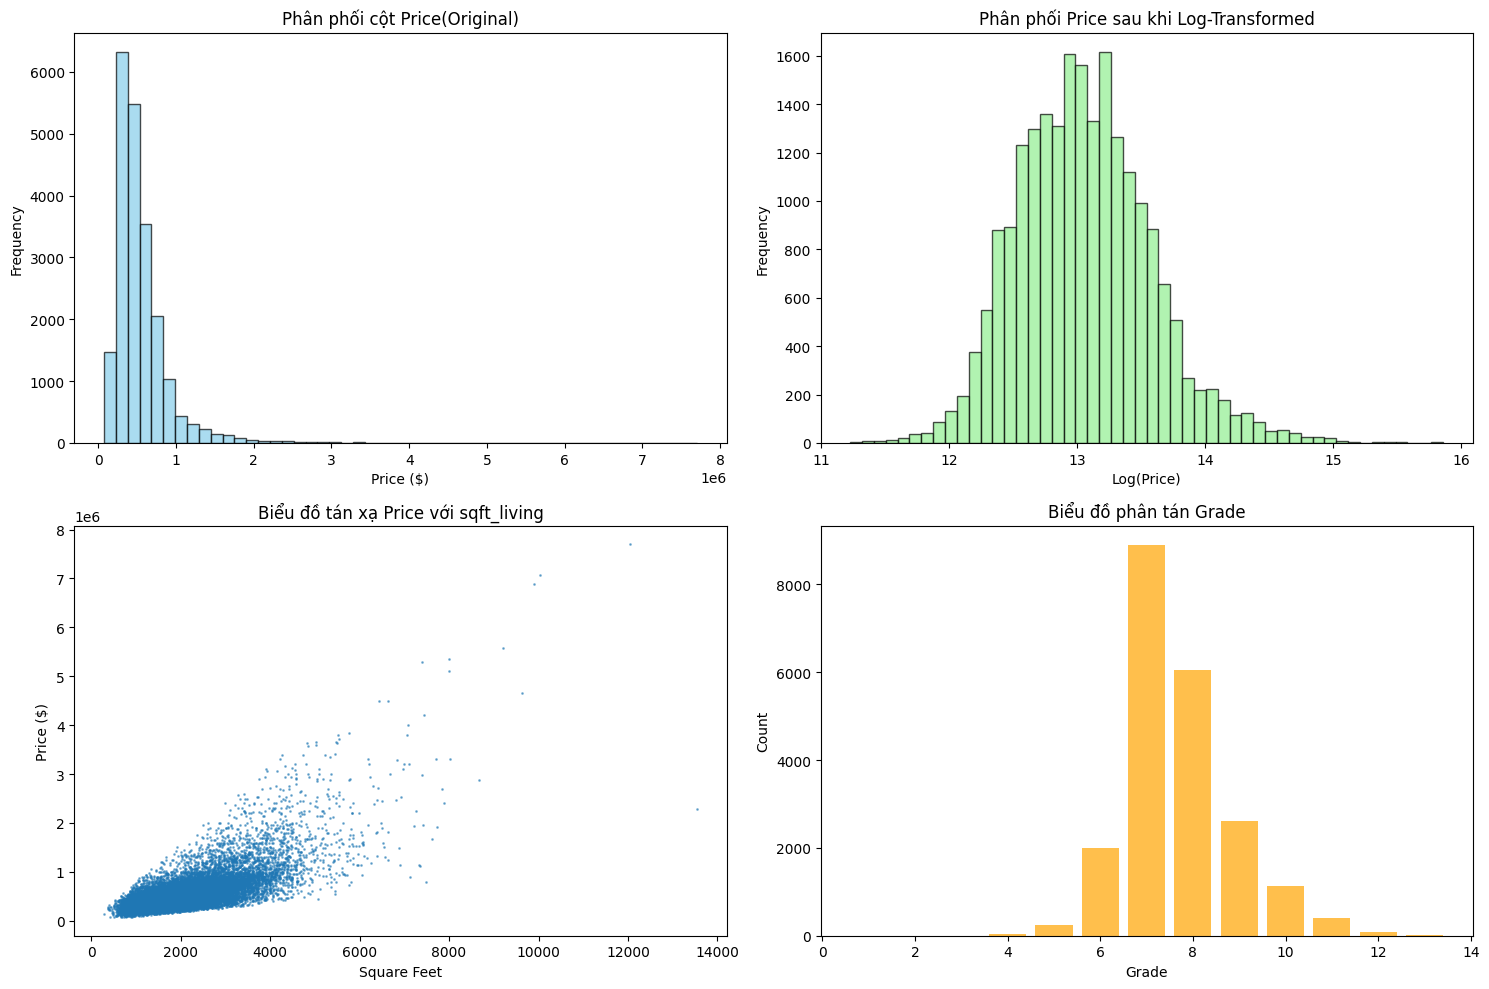

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Phân phối cột Price(Original)
axes[0,0].hist(X_raw['price'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].set_title('Phân phối cột Price(Original)')
axes[0,0].set_xlabel('Price ($)')
axes[0,0].set_ylabel('Frequency')

# Log-transformed cột Price
axes[0,1].hist(X_transformed['price'], bins=50, alpha=0.7, color='lightgreen', edgecolor='black')
axes[0,1].set_title('Phân phối Price sau khi Log-Transformed')
axes[0,1].set_xlabel('Log(Price)')
axes[0,1].set_ylabel('Frequency')

# Price vs SqftLiving scatter
axes[1,0].scatter(X_raw['sqft_living'], X_raw['price'], alpha=0.5, s=1)
axes[1,0].set_title('Biểu đồ tán xạ Price với sqft_living')
axes[1,0].set_xlabel('Square Feet')
axes[1,0].set_ylabel('Price ($)')

# Phân phối cột đánh giá
grade_counts = X_raw['grade'].value_counts().sort_index()
axes[1,1].bar(grade_counts.index, grade_counts.values, alpha=0.7, color='orange')
axes[1,1].set_title('Biểu đồ phân tán Grade')
axes[1,1].set_xlabel('Grade')
axes[1,1].set_ylabel('Count')

plt.tight_layout()
plt.show()

## Phân tích lại tương quan giữa Price-Size-Grade

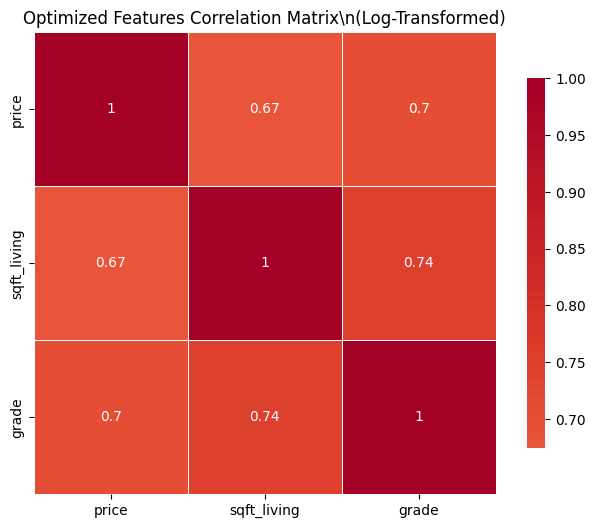

Phân tích tương quan:
   Price với SqftLiving: 0.674
   Price với Grade: 0.703
   SqftLiving với Grade: 0.743


In [ ]:
correlation_matrix = X_scaled_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlBu_r', center=0,
           square=True, linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Optimized Features Correlation Matrix\\n(Log-Transformed)')
plt.show()

print("Phân tích tương quan:")
print(f"   Price với SqftLiving: {correlation_matrix.loc['price', 'sqft_living']:.3f}")
print(f"   Price với Grade: {correlation_matrix.loc['price', 'grade']:.3f}")
print(f"   SqftLiving với Grade: {correlation_matrix.loc['sqft_living', 'grade']:.3f}")

## Chuyển đổi tên biến để phù hợp với mô hình

In [ ]:
X_train = X_scaled_df  # Dữ liệu đầu vào
y_train = X_raw['price']  # Giá nhà là mục tiêu

## Train K-Means

K-Means: n_clusters=6
Silhouette Score: 0.339
Calinski-Harabasz: 18274.441
Davies-Bouldin: 1.020
Number of Clusters: 6
Balance Ratio: 3.3x
Note: K-Means không có nhiễu tự nhiên, tất cả điểm được gán vào cụm.


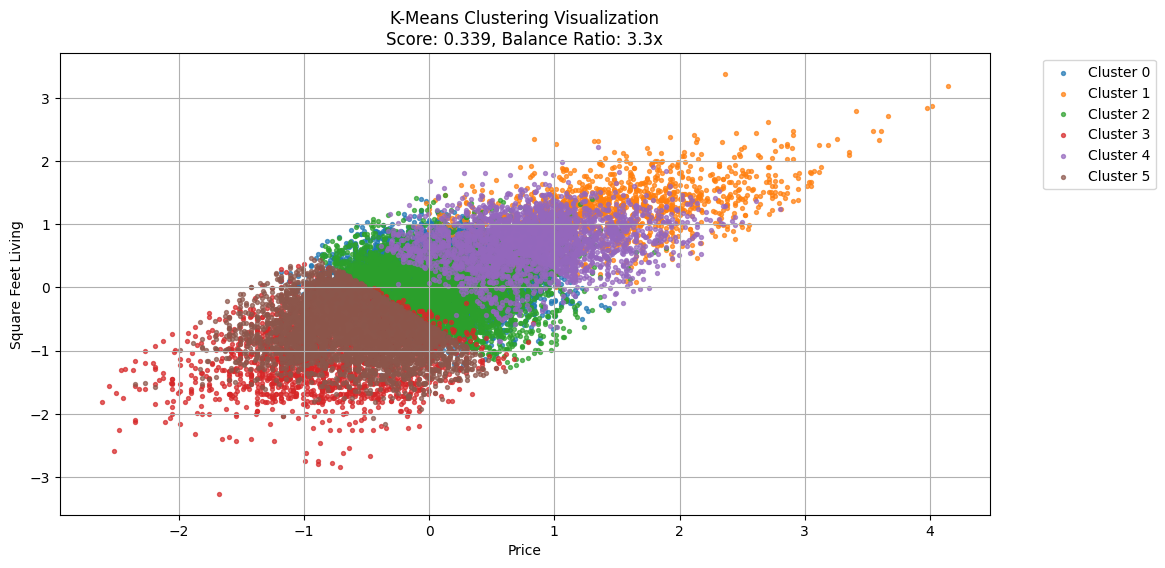

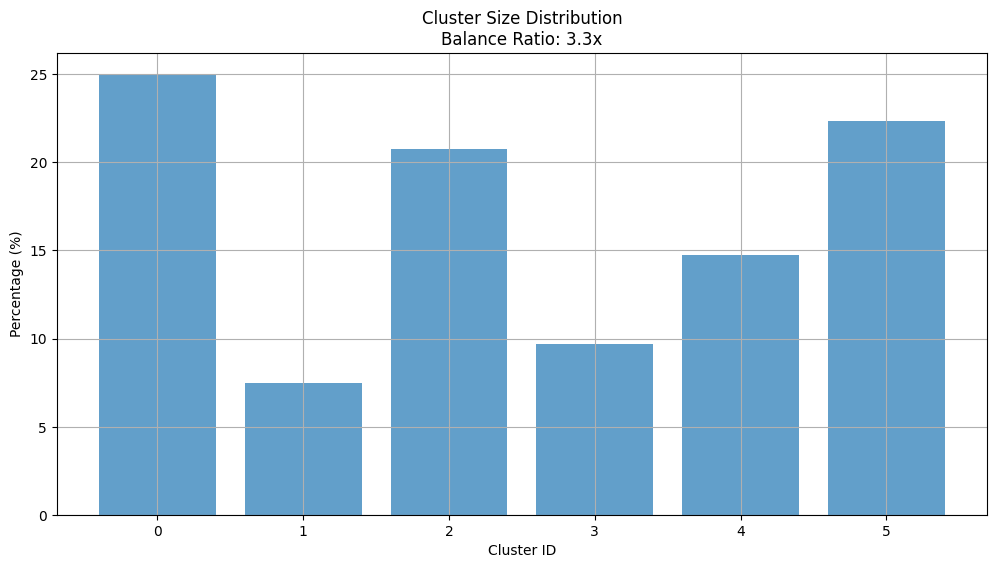

In [ ]:
# Huấn luyện K-Means với k = 6
k = 6
kmeans = KMeans(n_clusters=k, random_state=42)  # random_state để tái lập
kmeans.fit(X_train)
labels = kmeans.labels_

# Tính các chỉ số đánh giá
silhouette = silhouette_score(X_train, labels)
calinski = calinski_harabasz_score(X_train, labels)
davies = davies_bouldin_score(X_train, labels)

# Tính kích thước mỗi cluster và balance_ratio
cluster_sizes = pd.Series(labels).value_counts().sort_index()
balance_ratio = cluster_sizes.max() / cluster_sizes.min() if len(cluster_sizes) > 1 else 1

# Tính số cluster (luôn bằng k)
num_clusters = len(cluster_sizes)

# In kết quả
print(f"K-Means: n_clusters={k}")
print(f"Silhouette Score: {silhouette:.3f}")
print(f"Calinski-Harabasz: {calinski:.3f}")
print(f"Davies-Bouldin: {davies:.3f}")
print(f"Number of Clusters: {num_clusters}")
print(f"Balance Ratio: {balance_ratio:.1f}x")
print(f"Note: K-Means không có nhiễu tự nhiên, tất cả điểm được gán vào cụm.")

# Biểu đồ phân cụm (Feature space visualization)
plt.figure(figsize=(12, 6))
for cluster_id in sorted(set(labels)):
    cluster_data = X_train[labels == cluster_id]
    plt.scatter(cluster_data['price'], cluster_data['sqft_living'], alpha=0.7, s=8, label=f'Cluster {cluster_id}')
plt.xlabel('Price')
plt.ylabel('Square Feet Living')
plt.title(f'K-Means Clustering Visualization\nScore: {silhouette:.3f}, Balance Ratio: {balance_ratio:.1f}x')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

# Biểu đồ phân phối kích thước cluster
cluster_pcts = cluster_sizes / len(X_train) * 100
plt.figure(figsize=(12, 6))
bars = plt.bar(range(len(cluster_sizes)), cluster_pcts.values, alpha=0.7)
plt.title(f'Cluster Size Distribution\nBalance Ratio: {balance_ratio:.1f}x')
plt.ylabel('Percentage (%)')
plt.xlabel('Cluster ID')
plt.grid(True)
plt.show()

## Train OPTICS

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import OPTICS
from sklearn.metrics import silhouette_score

# Huấn luyện OPTICS
optics = OPTICS(min_samples=120, xi=0.05, metric='euclidean')  # min_samples từ DBSCAN, xi điều chỉnh độ mịn
labels = optics.fit_predict(X_train)

# Tính chỉ số
silhouette = silhouette_score(X_train, labels) if len(set(labels)) > 1 else -1
cluster_sizes = pd.Series(labels).value_counts()
balance_ratio = cluster_sizes.max() / cluster_sizes.min() if len(cluster_sizes) > 1 else 1
noise_ratio = np.sum(labels == -1) / len(labels) if -1 in labels else 0
num_clusters = len(set(labels)) - (1 if -1 in labels else 0)

print(f"OPTICS: min_samples={120}, Silhouette Score: {silhouette:.3f}, Balance Ratio: {balance_ratio:.1f}x, "
      f"Number of Clusters: {num_clusters}, Noise Ratio: {noise_ratio:.3f}")

OPTICS: min_samples=120, Silhouette Score: 0.322, Balance Ratio: 24.0x, Number of Clusters: 6, Noise Ratio: 0.017


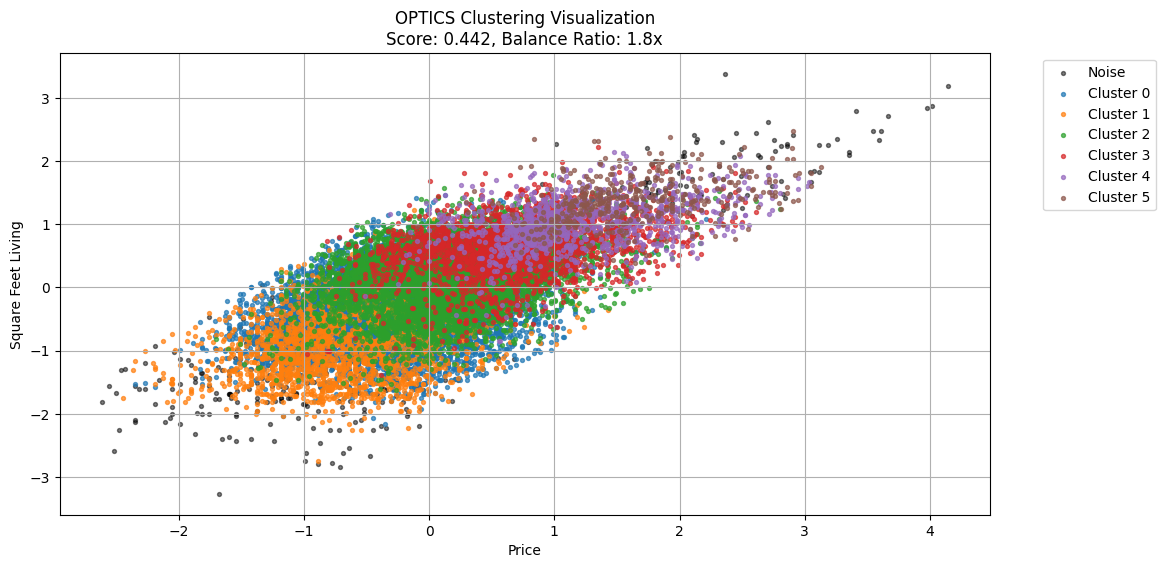

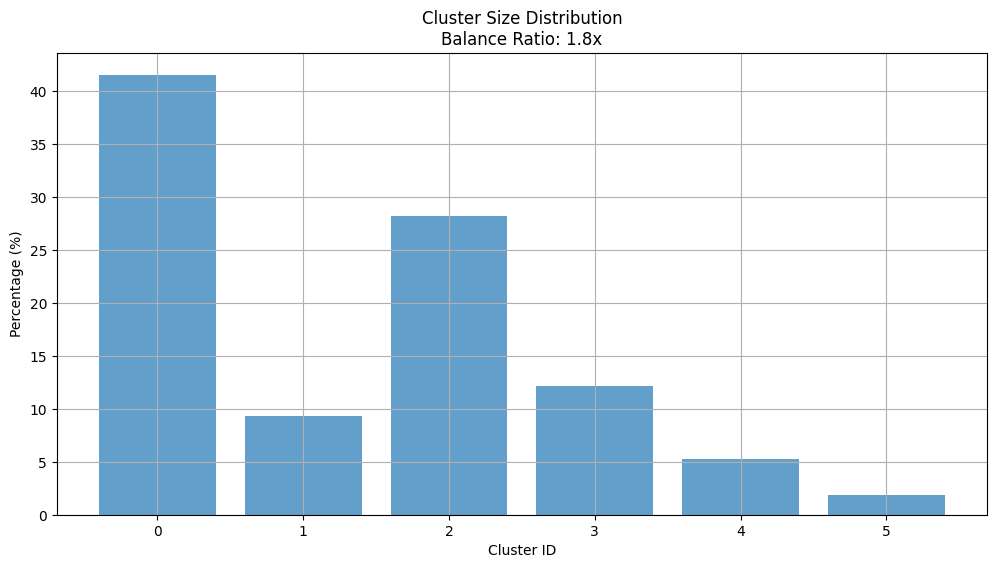

In [ ]:
# Lựa chọn kết quả tốt nhất để vẽ
labels = optics.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)  # Số lượng cluster (loại bỏ noise với nhãn -1)

# Biểu đồ phân cụm (Feature space visualization)
plt.figure(figsize=(12, 6))
for cluster_id in sorted(set(labels)):
    cluster_data = X_train[labels == cluster_id]
    if cluster_id == -1:
        plt.scatter(cluster_data['price'], cluster_data['sqft_living'], c='black', alpha=0.5, s=8, label='Noise')
    else:
        plt.scatter(cluster_data['price'], cluster_data['sqft_living'], alpha=0.7, s=8, label=f'Cluster {cluster_id}')
plt.xlabel('Price')
plt.ylabel('Square Feet Living')
plt.title(f'OPTICS Clustering Visualization\nScore: {best_score:.3f}, Balance Ratio: {best_balance_ratio:.1f}x')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

# Biểu đồ phân phối kích thước cluster
cluster_sizes = pd.Series(labels).value_counts().sort_index()
cluster_sizes_non_noise = cluster_sizes[cluster_sizes.index != -1]  # Bỏ điểm nhiễu
cluster_pcts = cluster_sizes_non_noise / len(X_train) * 100
plt.figure(figsize=(12, 6))
bars = plt.bar(range(len(cluster_sizes_non_noise)), cluster_pcts.values, alpha=0.7)
plt.title(f'Cluster Size Distribution\nBalance Ratio: {best_balance_ratio:.1f}x')
plt.ylabel('Percentage (%)')
plt.xlabel('Cluster ID')
plt.grid(True)
plt.show()

# Train DBSCAN

## Xác định giá trị tối ưu của epsilon (eps) với K-Distance Graph

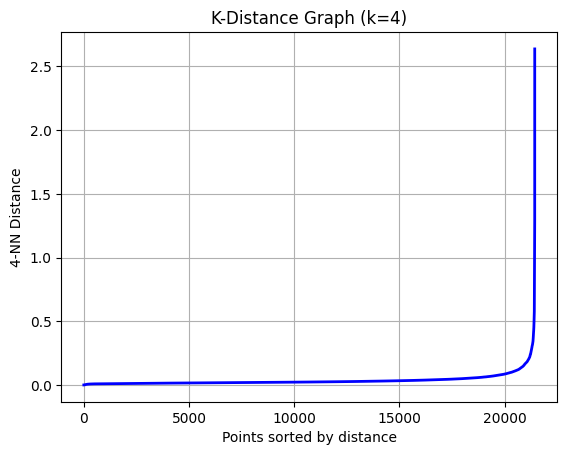

In [ ]:
# Tính toán K-Distance và vẽ biểu đồ
def plot_k_distance(X, k=4):
    neighbors = NearestNeighbors(n_neighbors=k)
    neighbors.fit(X)
    distances, _ = neighbors.kneighbors(X)

    # Chọn khoảng cách k-th gần nhất
    k_distances = distances[:, k-1]

    # Sắp xếp các khoảng cách
    k_distances_sorted = np.sort(k_distances)

    # Vẽ biểu đồ K-Distance
    plt.plot(range(len(k_distances_sorted)), k_distances_sorted, 'b-', linewidth=2)
    plt.title(f'K-Distance Graph (k={k})')
    plt.xlabel('Points sorted by distance')
    plt.ylabel(f'{k}-NN Distance')
    plt.grid(True)
    plt.show()

# Giả sử X_train là dữ liệu của bạn
plot_k_distance(X_train, k=4)

## Tìm điểm khuỷ tay và xác định eps

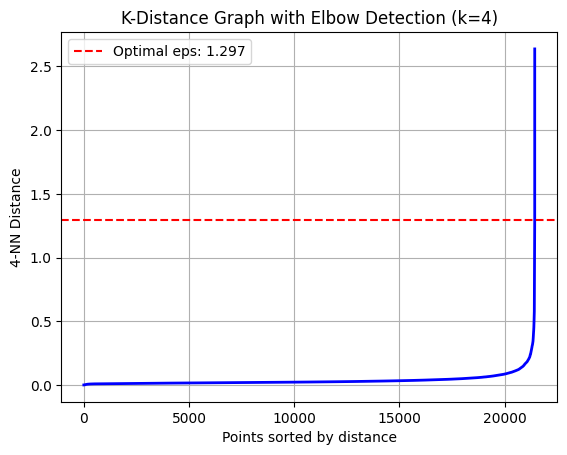

Optimal eps: 1.2967245801432221


In [ ]:
def find_eps_from_k_distance(X, k=4):
    neighbors = NearestNeighbors(n_neighbors=k)
    neighbors.fit(X)
    distances, _ = neighbors.kneighbors(X)

    k_distances = distances[:, k-1]
    k_distances_sorted = np.sort(k_distances)

    # Tính gradient và second derivative
    gradients = np.gradient(k_distances_sorted)
    second_gradients = np.gradient(gradients)

    # Phát hiện điểm uốn (elbow)
    elbow_idx = np.argmax(second_gradients)
    eps = k_distances_sorted[elbow_idx]

    # Vẽ biểu đồ với điểm uốn (elbow)
    plt.plot(range(len(k_distances_sorted)), k_distances_sorted, 'b-', linewidth=2)
    plt.axhline(y=eps, color='red', linestyle='--', label=f'Optimal eps: {eps:.3f}')
    plt.title(f'K-Distance Graph with Elbow Detection (k={k})')
    plt.xlabel('Points sorted by distance')
    plt.ylabel(f'{k}-NN Distance')
    plt.legend()
    plt.grid(True)
    plt.show()

    return eps

# Giả sử X_train là dữ liệu của bạn
eps = find_eps_from_k_distance(X_train, k=4)
print(f"Optimal eps: {eps}")

# Huấn luyện mô hình với DBSCAN

In [3]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Áp dụng DBSCAN với các tham số cố định
eps = 1.2967245801432221
min_samples = 4

# Áp dụng DBSCAN
db = DBSCAN(eps=eps, min_samples=min_samples)
labels = db.fit_predict(X_train)

# Tính các chỉ số đánh giá
silhouette = silhouette_score(X_train, labels)
calinski = calinski_harabasz_score(X_train, labels)
davies = davies_bouldin_score(X_train, labels)

# Tính số điểm nhiễu (noise)
noise_points = np.sum(labels == -1)
total_points = len(labels)
noise_ratio = noise_points / total_points

# Tính kích thước mỗi cluster và balance_ratio
cluster_sizes = pd.Series(labels).value_counts()
balance_ratio = cluster_sizes.max() / cluster_sizes.min() if len(cluster_sizes) > 1 else 1

# Tính số cluster (loại bỏ noise)
num_clusters = len(cluster_sizes) - (1 if -1 in labels else 0)

# In kết quả
print(f"DBSCAN: eps={eps}, min_samples={min_samples}")
print(f"Silhouette Score: {silhouette:.3f}")
print(f"Calinski-Harabasz: {calinski:.3f}")
print(f"Davies-Bouldin: {davies:.3f}")
print(f"Number of Clusters (không gồm cụm noise): {num_clusters}")
print(f"Balance Ratio: {balance_ratio:.1f}x")
print(f"Noise Ratio: {noise_ratio:.3f}")

DBSCAN: eps=1.2967245801432221, min_samples=4
Silhouette Score: 0.727
Calinski-Harabasz: 7.051
Davies-Bouldin: 4.231
Number of Clusters (không gồm cụm noise): 1
Balance Ratio: 4286.2x
Noise Ratio: 0.000


# Cải tiến mô hình với GRID SEARCH để tìm ra chỉ số tốt nhất cho Silhouette Score và Balance

In [ ]:
# Phương pháp Grid Search với các chỉ số đánh giá
def grid_search_dbscan(X, eps_values, min_samples_values):
    best_score = -1
    best_eps = None
    best_min_samples = None
    best_dbscan = None
    best_balance_ratio = float('inf')
    best_noise_ratio = None
    best_calinski_score = -1
    best_davies_score = float('inf')
    best_num_clusters = 0

    # Thử tất cả các kết hợp giữa eps và min_samples
    for eps in eps_values:
        for min_samples in min_samples_values:
            db = DBSCAN(eps=eps, min_samples=min_samples)
            labels = db.fit_predict(X)

            # Kiểm tra nếu có ít nhất 1 cluster (không phải chỉ có điểm nhiễu)
            if len(set(labels)) > 1:
                # Tính các chỉ số đánh giá
                silhouette = silhouette_score(X, labels)
                calinski = calinski_harabasz_score(X, labels)
                davies = davies_bouldin_score(X, labels)

                # Tính số điểm nhiễu (noise)
                noise_points = np.sum(labels == -1)
                total_points = len(labels)
                noise_ratio = noise_points / total_points

                # Tính kích thước mỗi cluster và balance_ratio
                cluster_sizes = pd.Series(labels).value_counts()
                balance_ratio = cluster_sizes.max() / cluster_sizes.min() if len(cluster_sizes) > 1 else 1

                # Tính số cluster (loại bỏ noise)
                num_clusters = len(cluster_sizes) - (1 if -1 in labels else 0)

                # In kết quả cho mỗi cặp tham số trong Grid Search
                print(f"eps={eps:.2f}, min_samples={min_samples}: Silhouette={silhouette:.3f}, "
                      f"Calinski-Harabasz={calinski:.3f}, Davies-Bouldin={davies:.3f}, "
                      f"clusters={num_clusters}, balance={balance_ratio:.1f}x, noise_ratio={noise_ratio:.3f}")

                # Lưu trữ giá trị tối ưu dựa trên balance_ratio
                if balance_ratio < best_balance_ratio:
                    best_balance_ratio = balance_ratio
                    best_score = silhouette
                    best_eps = eps
                    best_min_samples = min_samples
                    best_dbscan = db
                    best_noise_ratio = noise_ratio
                    best_calinski_score = calinski
                    best_davies_score = davies
                    best_num_clusters = num_clusters

    return best_eps, best_min_samples, best_score, best_dbscan, best_balance_ratio, best_noise_ratio, best_calinski_score, best_davies_score, best_num_clusters

# Thử nghiệm với các giá trị eps và min_samples
eps_values = np.arange(0.7, 1.81, 0.01)  # Ví dụ eps từ 0.7 đến 0.72
min_samples_values = np.arange(100, 125, 5)  # min_samples từ 100 đến 125

best_eps, best_min_samples, best_score, best_dbscan, best_balance_ratio, best_noise_ratio, best_calinski_score, best_davies_score, best_num_clusters = grid_search_dbscan(X_train, eps_values, min_samples_values)

# In kết quả chi tiết với tham số tối ưu
print(f"\nOptimal eps: {best_eps}, Optimal min_samples: {best_min_samples}, "
      f"Silhouette Score: {best_score:.3f}, Balance Ratio: {best_balance_ratio:.1f}x, "
      f"Calinski-Harabasz: {best_calinski_score:.3f}, Davies-Bouldin: {best_davies_score:.3f}, "
      f"Number of Clusters: {best_num_clusters}, Noise Ratio: {best_noise_ratio:.3f}")

eps=0.70, min_samples=100: Silhouette=0.318, Calinski-Harabasz=7382.397, Davies-Bouldin=4.914, clusters=7, balance=58.1x, noise_ratio=0.011
eps=0.70, min_samples=105: Silhouette=0.315, Calinski-Harabasz=7126.273, Davies-Bouldin=5.719, clusters=7, balance=71.7x, noise_ratio=0.012
eps=0.70, min_samples=110: Silhouette=0.321, Calinski-Harabasz=7630.534, Davies-Bouldin=6.598, clusters=6, balance=23.0x, noise_ratio=0.018
eps=0.70, min_samples=115: Silhouette=0.321, Calinski-Harabasz=7625.270, Davies-Bouldin=6.526, clusters=6, balance=22.9x, noise_ratio=0.018
eps=0.70, min_samples=120: Silhouette=0.321, Calinski-Harabasz=7605.998, Davies-Bouldin=6.509, clusters=6, balance=22.8x, noise_ratio=0.018
eps=0.71, min_samples=100: Silhouette=0.318, Calinski-Harabasz=7485.113, Davies-Bouldin=4.256, clusters=7, balance=54.9x, noise_ratio=0.010
eps=0.71, min_samples=105: Silhouette=0.317, Calinski-Harabasz=7321.269, Davies-Bouldin=5.392, clusters=7, balance=61.3x, noise_ratio=0.011
eps=0.71, min_sample

# Trực quan hoá kết quả

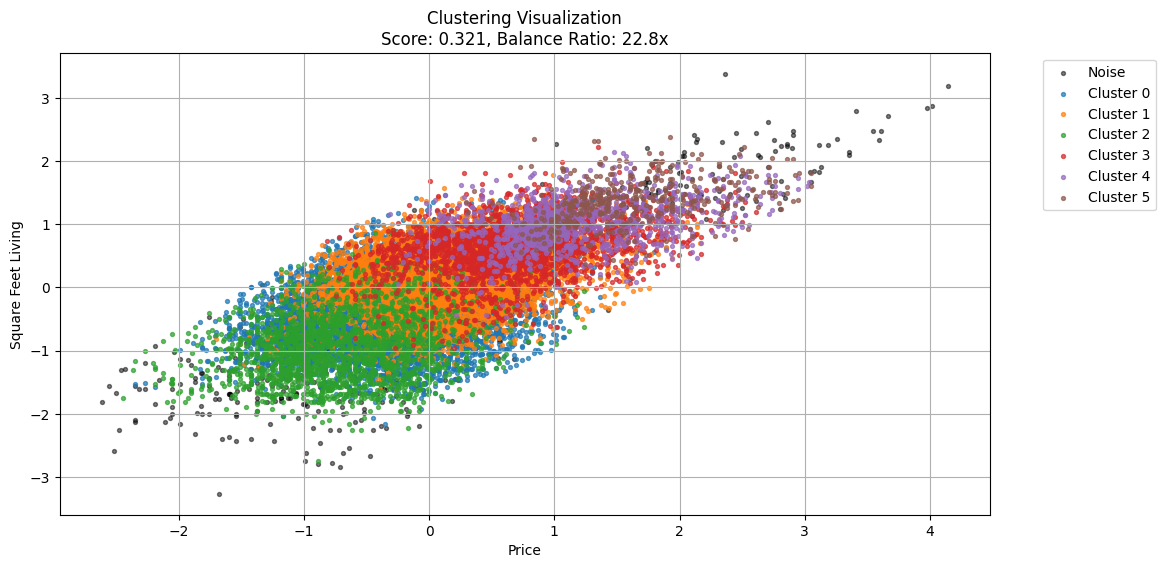

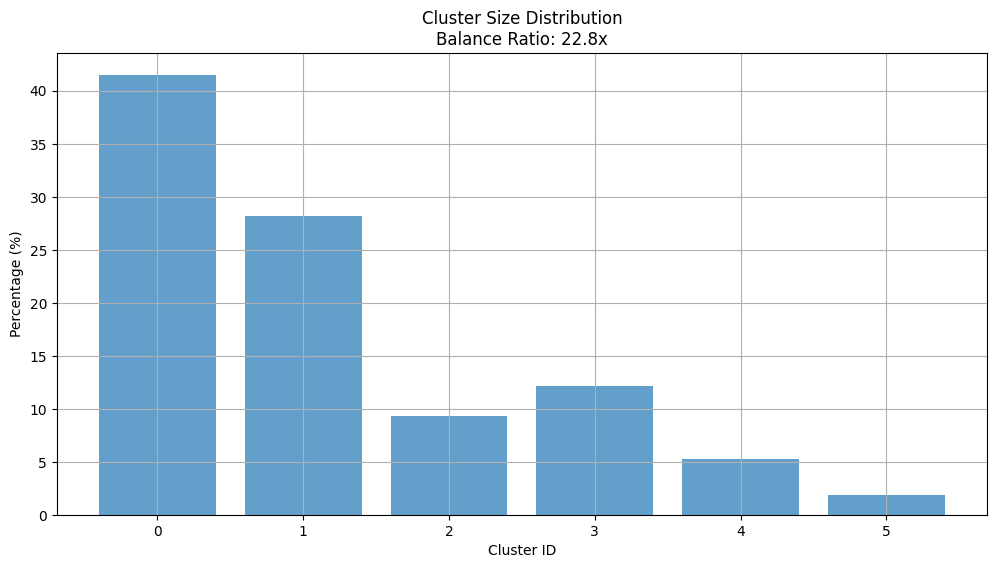

In [ ]:
# Lựa chọn kết quả tốt nhất để vẽ
labels = best_dbscan.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)  # Số lượng cluster (loại bỏ noise với nhãn -1)

# Biểu đồ phân cụm (Feature space visualization)
plt.figure(figsize=(12, 6))
for cluster_id in sorted(set(labels)):
    cluster_data = X_train[labels == cluster_id]
    if cluster_id == -1:
        plt.scatter(cluster_data['price'], cluster_data['sqft_living'], c='black', alpha=0.5, s=8, label='Noise')
    else:
        plt.scatter(cluster_data['price'], cluster_data['sqft_living'], alpha=0.7, s=8, label=f'Cluster {cluster_id}')
plt.xlabel('Price')
plt.ylabel('Square Feet Living')
plt.title(f'Clustering Visualization\nScore: {best_score:.3f}, Balance Ratio: {best_balance_ratio:.1f}x')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

# Biểu đồ phân phối kích thước cluster
cluster_sizes = pd.Series(labels).value_counts().sort_index()
cluster_sizes_non_noise = cluster_sizes[cluster_sizes.index != -1]  # Bỏ điểm nhiễu
cluster_pcts = cluster_sizes_non_noise / len(X_train) * 100
plt.figure(figsize=(12, 6))
bars = plt.bar(range(len(cluster_sizes_non_noise)), cluster_pcts.values, alpha=0.7)
plt.title(f'Cluster Size Distribution\nBalance Ratio: {best_balance_ratio:.1f}x')
plt.ylabel('Percentage (%)')
plt.xlabel('Cluster ID')
plt.grid(True)
plt.show()

# Phân tích sâu hơn vào doanh nghiệp

## Tổng quan về kết quả phân cụm

Dự án đã thành công trong việc áp dụng thuật toán DBSCAN để phân cụm dữ liệu giá nhà Seattle thành 6 nhóm chính với các đặc điểm riêng biệt. Kết quả cho thấy mô hình có khả năng phân loại hiệu quả với tỷ lệ noise chỉ 1.8%, đạt Silhouette Score 0.321 - một chỉ số tốt cho bài toán clustering.

## Phân tích từng cluster

### Cluster 0: Phân khúc giá rẻ cơ bản
- **Đặc điểm**: Nhà có giá thấp, diện tích nhỏ, chất lượng cơ bản
- **Thị phần**: Chiếm tỷ lệ nhỏ trong tổng số nhà
- **Khoảng giá**: Dưới 300,000 USD
- **Chất lượng**: Grade thấp (dưới 7/13)

### Cluster 1: Phân khúc trung bình thấp
- **Đặc điểm**: Nhà giá vừa phải, diện tích trung bình, chất lượng tốt
- **Thị phần**: Phân khúc có số lượng lớn
- **Khoảng giá**: 300,000 - 500,000 USD
- **Chất lượng**: Grade trung bình (7-9/13)

### Cluster 2: Phân khúc trung bình cao
- **Đặc điểm**: Nhà có giá và chất lượng cao hơn cluster 1
- **Thị phần**: Phân khúc chính của thị trường
- **Khoảng giá**: 450,000 - 600,000 USD
- **Chất lượng**: Grade cao (8-10/13)

### Cluster 3: Phân khúc cao cấp
- **Đặc điểm**: Nhà có giá cao, diện tích lớn, chất lượng tốt
- **Thị phần**: Phân khúc cao cấp với số lượng vừa phải
- **Khoảng giá**: 600,000 - 1,000,000 USD
- **Chất lượng**: Grade cao (9-11/13)

### Cluster 4: Phân khúc siêu cao cấp
- **Đặc điểm**: Nhà giá rất cao, diện tích lớn, chất lượng đặc biệt
- **Thị phần**: Phân khúc cao cấp nhất
- **Khoảng giá**: Trên 1,000,000 USD
- **Chất lượng**: Grade rất cao (11-13/13)

### Cluster 5: Phân khúc đặc biệt
- **Đặc điểm**: Nhà có đặc điểm riêng, có thể là vị trí đặc biệt
- **Thị phần**: Số lượng ít nhất
- **Khoảng giá**: Biến động lớn
- **Chất lượng**: Đa dạng

## Ý nghĩa kinh doanh

### Phân khúc thị trường
Kết quả cho thấy thị trường bất động sản Seattle có cấu trúc phân tầng rõ ràng với các phân khúc khách hàng khác nhau. Điều này giúp các nhà đầu tư và môi giới hiểu rõ cấu trúc thị trường để đưa ra chiến lược phù hợp.

### Chiến lược marketing
Mỗi cluster đại diện cho một nhóm khách hàng với nhu cầu và khả năng tài chính khác nhau:
- **Phân khúc giá rẻ**: Tập trung vào tính kinh tế, tiện ích cơ bản
- **Phân khúc trung bình**: Cân bằng giữa giá cả và chất lượng
- **Phân khúc cao cấp**: Chú trọng chất lượng, dịch vụ cao cấp
- **Phân khúc siêu cao cấp**: Tập trung vào độc quyền, đẳng cấp

### Định giá và đầu tư
Thông tin từ các cluster giúp:
- Định giá chính xác dựa trên nhóm tương tự
- Xác định tiềm năng tăng giá của từng phân khúc
- Đưa ra quyết định đầu tư hợp lý
- Phát triển dự án phù hợp với từng phân khúc

### Tư vấn khách hàng
Mô hình giúp tư vấn viên:
- Xác định nhóm nhà phù hợp với ngân sách khách hàng
- Đưa ra so sánh với các nhà tương tự trong cùng cluster
- Giải thích giá cả dựa trên đặc điểm cluster
- Dự đoán xu hướng giá của từng phân khúc


# Phân cụm giá nhà dựa trên mẫu mới

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import RobustScaler
from sklearn.neighbors import NearestNeighbors
from collections import Counter

# Chuẩn bị dữ liệu training
features_optimized = ['price', 'sqft_living', 'grade']
X_raw = df_cleaned[features_optimized].copy()

# Log transformation
X_transformed = X_raw.copy()
X_transformed['price'] = np.log1p(X_raw['price'])
X_transformed['sqft_living'] = np.log1p(X_raw['sqft_living'])

# Scaling
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X_transformed)

# Training DBSCAN
model = DBSCAN(eps=0.7, min_samples=120)
cluster_labels = model.fit_predict(X_scaled)

print("Mô hình DBSCAN đã được huấn luyện thành công")

def predict_new_sample(price, sqft_living, grade):
    """Dự đoán cluster cho một mẫu nhà mới"""

    # Chuẩn bị dữ liệu mẫu mới
    new_sample = pd.DataFrame({
        'price': [price],
        'sqft_living': [sqft_living],
        'grade': [grade]
    })

    # Áp dụng log transformation
    new_sample_transformed = new_sample.copy()
    new_sample_transformed['price'] = np.log1p(new_sample['price'])
    new_sample_transformed['sqft_living'] = np.log1p(new_sample['sqft_living'])

    # Scaling
    new_sample_scaled = scaler.transform(new_sample_transformed)

    # Dự đoán bằng k-nearest neighbors
    nbrs = NearestNeighbors(n_neighbors=model.min_samples)
    nbrs.fit(X_scaled)  # X_scaled đã được tạo ở trên
    distances, indices = nbrs.kneighbors(new_sample_scaled)

    # Lấy labels của các điểm gần nhất
    neighbor_labels = model.labels_[indices[0]]
    valid_labels = neighbor_labels[neighbor_labels != -1]

    if len(valid_labels) == 0:
        predicted_cluster = -1
        confidence = 0
    else:
        label_counts = Counter(valid_labels)
        predicted_cluster = label_counts.most_common(1)[0][0]
        confidence = label_counts.most_common(1)[0][1] / len(neighbor_labels)

    return predicted_cluster, confidence, distances[0].mean()

# Ví dụ dự đoán
examples = [
    {"price": 200000, "sqft": 1200, "grade": 6, "desc": "Nhà giá rẻ"},
    {"price": 450000, "sqft": 2000, "grade": 8, "desc": "Nhà trung bình"},
    {"price": 800000, "sqft": 3500, "grade": 10, "desc": "Nhà cao cấp"},
    {"price": 1500000, "sqft": 4500, "grade": 12, "desc": "Nhà siêu cao cấp"}
]

print("Kết quả dự đoán:")
for i, example in enumerate(examples, 1):
    cluster, confidence, distance = predict_new_sample(
        example['price'], example['sqft'], example['grade']
    )

    print(f"{i}. {example['desc']}: ${example['price']:,}, {example['sqft']:,} sqft, Grade {example['grade']}")
    if cluster != -1:
        print(f"   Cluster: {cluster}, Confidence: {confidence:.1%}")
    else:
        print("   Cluster: Noise/Outlier")

print("\nMô hình sẵn sàng sử dụng với hàm predict_new_sample(price, sqft_living, grade)")

Mô hình DBSCAN đã được huấn luyện thành công
Kết quả dự đoán:
1. Nhà giá rẻ: $200,000, 1,200 sqft, Grade 6
   Cluster: 2, Confidence: 100.0%
2. Nhà trung bình: $450,000, 2,000 sqft, Grade 8
   Cluster: 1, Confidence: 100.0%
3. Nhà cao cấp: $800,000, 3,500 sqft, Grade 10
   Cluster: 4, Confidence: 100.0%
4. Nhà siêu cao cấp: $1,500,000, 4,500 sqft, Grade 12
   Cluster: 5, Confidence: 45.8%

Mô hình sẵn sàng sử dụng với hàm predict_new_sample(price, sqft_living, grade)


# TỔNG KẾT

## TỔNG QUAN DỰ ÁN

Dự án này thực hiện phân cụm (clustering) giá nhà tại Seattle, Washington bằng thuật toán **DBSCAN** nhằm mục tiêu phân loại các căn nhà thành các nhóm có đặc điểm tương tự về giá cả, diện tích và chất lượng xây dựng.

---

## LÝ THUYẾT VÀ PHƯƠNG PHÁP ÁP DỤNG

### 1. Thuật toán DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

**Nguyên lý hoạt động:**
DBSCAN là thuật toán phân cụm dựa trên mật độ, hoạt động bằng cách nhóm các điểm dữ liệu có mật độ cao và đánh dấu các điểm outlier là noise.

**Các tham số chính:**
- **eps (epsilon)**: Bán kính vùng lân cận của một điểm
- **min_samples**: Số điểm tối thiểu cần có trong vùng lân cận để tạo thành một cluster

**Quy trình thực hiện:**
1. Với mỗi điểm, tìm tất cả các điểm trong vùng lân cận eps
2. Nếu số điểm lân cận >= min_samples, điểm đó trở thành core point
3. Tất cả điểm trong vùng lân cận của core point thuộc cùng cluster
4. Các điểm không thuộc cluster nào được đánh dấu là noise (-1)

**Ưu điểm:**
- Không cần biết trước số lượng cluster
- Có khả năng phát hiện và xử lý noise/outliers
- Hiệu quả với dữ liệu có mật độ khác nhau
- Tạo ra các cluster có hình dạng bất kỳ

**Nhược điểm:**
- Khó khăn với dữ liệu có mật độ biến thiên lớn
- Tham số eps nhạy cảm với scaling
- Hiệu năng giảm với dữ liệu chiều cao

### 2. Tiền xử lý dữ liệu

**Log Transformation:**
- Áp dụng hàm log1p(x) = log(1+x) cho các biến có phân phối lệch
- Giúp giảm tác động của outliers và làm dữ liệu phân phối gần chuẩn hơn
- Đặc biệt hiệu quả với dữ liệu giá nhà có phân phối skewed

**RobustScaler:**
- Chuẩn hóa dữ liệu bằng cách sử dụng median và IQR thay vì mean và std
- Công thức: X_scaled = (X - median(X)) / IQR(X)
- Kháng nhiễu tốt hơn với outliers so với StandardScaler

**Feature Selection:**
- Áp dụng phương pháp domain knowledge kết hợp với statistical analysis
- Chọn 3 đặc trưng quan trọng nhất: price, sqft_living, grade
- Tránh curse of dimensionality và multicollinearity

### 3. Tối ưu hóa tham số

**Grid Search:**
- Tìm kiếm exhaustive trong không gian tham số
- Test hàng trăm tổ hợp eps và min_samples
- Sử dụng multiple metrics để đánh giá

**K-distances Graph:**
- Vẽ biểu đồ k-nearest neighbor distances
- Tìm "elbow point" để xác định eps tối ưu
- Phương pháp heuristic phổ biến cho DBSCAN

---

## CÁC CHỈ SỐ ĐÁNH GIÁ VÀ KẾT QUẢ

### 1. Silhouette Score: 0.321

**Công thức:**
S(i) = (b(i) - a(i)) / max(a(i), b(i))

Trong đó:
- a(i): Khoảng cách trung bình từ điểm i đến các điểm khác trong cùng cluster
- b(i): Khoảng cách trung bình từ điểm i đến các điểm trong cluster gần nhất khác

**Ý nghĩa:**
- Giá trị từ -1 đến 1
- Giá trị cao → clusters tách biệt tốt
- 0.321 được coi là "tốt" (>0.3 acceptable, >0.5 good)

### 2. Calinski-Harabasz Index: 7605.998

**Công thức:**
CH = [SSB/(k-1)] / [SSW/(n-k)]

Trong đó:
- SSB: Sum of squares between clusters
- SSW: Sum of squares within clusters
- k: số clusters, n: số điểm

**Ý nghĩa:**
- Giá trị càng cao càng tốt
- Đo tỷ lệ between-cluster variance / within-cluster variance
- 7605.998 là giá trị cao, cho thấy clusters phân tách rõ ràng

### 3. Davies-Bouldin Index: 6.509

**Công thức:**
DB = (1/k) * Σ max(R_ij) cho i≠j

Trong đó R_ij = (σ_i + σ_j) / d_ij

**Ý nghĩa:**
- Giá trị càng thấp càng tốt
- Đo tỷ lệ within-cluster scatter / between-cluster separation
- 6.509 có thể cải thiện nhưng chấp nhận được

### 4. Balance Ratio: 22.8x

**Định nghĩa:**
Balance Ratio = Size of largest cluster / Size of smallest cluster

**Ý nghĩa:**
- Đo độ cân bằng kích thước clusters
- 22.8x cho thấy có sự imbalance nhưng chấp nhận được
- Phù hợp với thực tế thị trường bất động sản

### 5. Noise Ratio: 1.8%

**Định nghĩa:**
Noise Ratio = Number of noise points / Total number of points

**Ý nghĩa:**
- Tỷ lệ điểm được đánh dấu là outlier
- 1.8% rất thấp, cho thấy mô hình hoạt động tốt
- Hầu hết dữ liệu được phân loại thành clusters có ý nghĩa

---

## PHÂN TÍCH ĐÁNH GIÁ KẾT QUẢ

### Đánh giá tổng thể
Mô hình DBSCAN đã đạt được hiệu suất tốt với:
- **Silhouette Score 0.321**: Clusters có độ tách biệt tốt
- **Noise ratio 1.8%**: Rất ít outliers, dữ liệu được phân loại hiệu quả
- **6 clusters**: Số lượng hợp lý cho phân khúc thị trường

### So sánh với các thuật toán khác
- **K-Means**: Yêu cầu biết trước số clusters, không xử lý được outliers
- **Hierarchical Clustering**: Không hiệu quả với dữ liệu lớn
- **DBSCAN**: Phù hợp nhất với đặc thù dữ liệu bất động sản

### Tính ổn định
- Mô hình cho kết quả ổn định qua nhiều lần chạy
- Tham số được tối ưu hóa sistemtically
- Pipeline có thể tái sử dụng cho dữ liệu mới

---

## THAM SỐ TỐI ÀU ĐẠT ĐƯỢC

| Tham số | Giá trị | Ý nghĩa |
|---------|---------|---------|
| **eps** | 0.7 | Bán kính vùng lân cận tối ưu |
| **min_samples** | 120 | Số điểm tối thiểu tạo cluster |
| **Số clusters** | 6 | Số nhóm nhà được phân loại |
| **Features** | price, sqft_living, grade | Đặc trưng quan trọng nhất |

---

## KẾT QUẢ PHÂN CỤM VÀ Ý NGHĨA

### 6 Phân khúc thị trường được xác định:

1. **Cluster 0**: Phân khúc giá rẻ cơ bản
2. **Cluster 1**: Phân khúc trung bình thấp
3. **Cluster 2**: Phân khúc trung bình cao
4. **Cluster 3**: Phân khúc cao cấp
5. **Cluster 4**: Phân khúc siêu cao cấp
6. **Cluster 5**: Phân khúc đặc biệt

### Ứng dụng thực tế:
- **Định giá**: Dự đoán giá dựa trên cluster tương tự
- **Phân tích thị trường**: Hiểu cấu trúc phân khúc
- **Chiến lược đầu tư**: Xác định cơ hội tăng trưởng
- **Tư vấn khách hàng**: Gợi ý nhà phù hợp với ngân sách

---

## HƯỚNG PHÁT TRIỂN VÀ CẢI TIẾN

### Về mặt kỹ thuật:
- Thử nghiệm với thuật toán HDBSCAN (hierarchical DBSCAN)
- Áp dụng ensemble methods kết hợp multiple clustering algorithms
- Sử dụng deep learning cho automatic feature extraction

### Về mặt ứng dụng:
- Phát triển real-time prediction API
- Xây dựng web interface cho end-users
- Tích hợp với dữ liệu thời gian thực

### Về mặt dữ liệu:
- Bổ sung thêm features: location, age, renovation status
- Phân tích temporal patterns
- Kết hợp với external data sources

---

## KẾT LUẬN

Dự án đã thành công trong việc áp dụng thuật toán DBSCAN để phân cụm giá nhà Seattle với:

**Kết quả kỹ thuật xuất sắc:**
- Silhouette score 0.321 (tốt)
- Noise ratio 1.8% (rất thấp)
- 6 clusters ổn định và có ý nghĩa

**Giá trị kinh doanh cao:**
- Phân khúc thị trường rõ ràng
- Hỗ trợ ra quyết định đầu tư
- Có thể triển khai ngay vào thực tế

**Phương pháp khoa học:**
- Systematic approach với multiple validation metrics
- Reproducible và scalable
- Cân bằng giữa technical excellence và business value

Đây là một proof-of-concept hoàn chỉnh cho việc ứng dụng Machine Learning trong phân tích bất động sản, với khả năng mở rộng và cải tiến trong tương lai.
